In [2]:
import numpy as np
from os import listdir
from os.path import isfile, join
from examples.ArtificialMusclesCases import *
import matplotlib

matplotlib.use("TkAgg")
from matplotlib import pyplot as plt
%matplotlib inline
from os import getcwd

In [248]:
data_files_list = []
def datapath(path,i):
    return path+"{0}".format(i)
# n_elem_list = [24,36,48,72,60]
# n_elem_list = [24,36,48,72]
n_elem_list = [72,96]
# path = '/Users/ali-7800/Desktop/Research/dev_artificial_muscle/PyElastica/examples/ArtificialMusclesCases/SingleMuscleCases/PassiveForceTest/Samuel_supercoil_stl/data/converegence/'
# path = '/Users/ali-7800/Desktop/Research/dev_artificial_muscle/PyElastica/examples/ArtificialMusclesCases/SingleMuscleCases/ActiveForceTest/Samuel_supercoil_stl/data/convergence/'
# path = '/Users/ali-7800/Desktop/Research/dev_artificial_muscle/PyElastica/examples/ArtificialMusclesCases/SingleMuscleCases/ActiveForceTest/Samuel_supercoil_stl/data/convergence_k_repulsive_100/'
path = '/Users/ali-7800/Desktop/Research/dev_artificial_muscle/PyElastica/examples/ArtificialMusclesCases/SingleMuscleCases/ActiveForceTest/Samuel_supercoil_stl/data/convergence_k_250/'
for i in n_elem_list:
    # data_path = {0}'.format(i)
    data_path = datapath(path,i)
    data_files_list.append((([f for f in listdir(data_path) if isfile(join(data_path,f))]),i))


In [249]:
strain = np.zeros((len(data_files_list),len(data_files_list[0][0])))
forces = np.zeros((len(data_files_list),len(data_files_list[0][0])))
test_muscle = Samuel_supercoil_stl(experimental_data=True)


In [250]:

for datafiles_tuple,i in zip(data_files_list,range(len(data_files_list))):
    datafiles = datafiles_tuple[0]
    n_elem = datafiles_tuple[1]
    current_strain = np.zeros(len(datafiles))
    current_forces = np.zeros(len(datafiles))

    for datafile_name,j in zip(datafiles,range(len(datafiles))):
        
        current_forces[j] = float(datafile_name[26:43])
        data_path = datapath(path,n_elem)

        data = np.load(data_path+"/"+datafile_name)

        muscle_positions = (np.array(data['muscle_rods_position_history']))
        centerline_position = np.zeros(muscle_positions.shape[1:])
        for k in range(muscle_positions.shape[0]):
            centerline_position += muscle_positions[k, :, :, :] / 3

        # n = centerline_position.shape[-1]
        current_strain[j] = np.dot(
            np.array([0.0,0.0,1.0]),
            (
                (centerline_position[-1, :, -1] - centerline_position[-1, :, 0])
                - (centerline_position[0, :, -1] - centerline_position[0, :, 0])
            )
            / (centerline_position[0, :, -1] - centerline_position[0, :, 0]),
        )

    sort_idx = np.argsort(current_strain)
    strain[i,:] = current_strain[sort_idx]
    forces[i,:] = current_forces[sort_idx]



In [251]:
error = abs(strain-strain[-1,:])/abs(strain[-1,:])
error

array([[25.15376795, 12.61126336,  1.57540667,  0.60332173],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

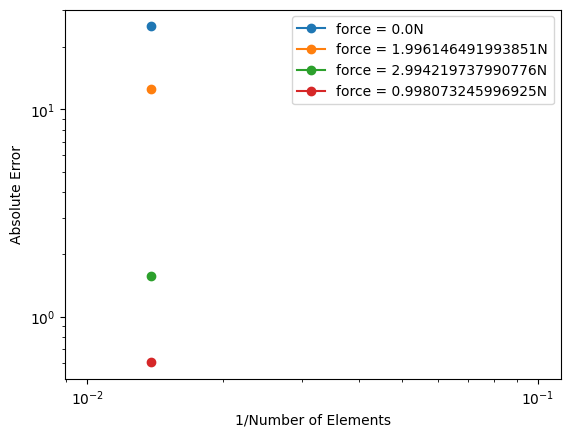

In [252]:
fig, ax = plt.subplots()
for current_force,i in zip(forces[-1,:],range(len(forces[-1,:]))):
    ax.plot(1/np.array(n_elem_list)[:-1],error[:-1,i], "o-",label="force = {0}N".format(current_force))
ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)
plt.xlabel("1/Number of Elements")
plt.ylabel("Absolute Error")
plt.legend()

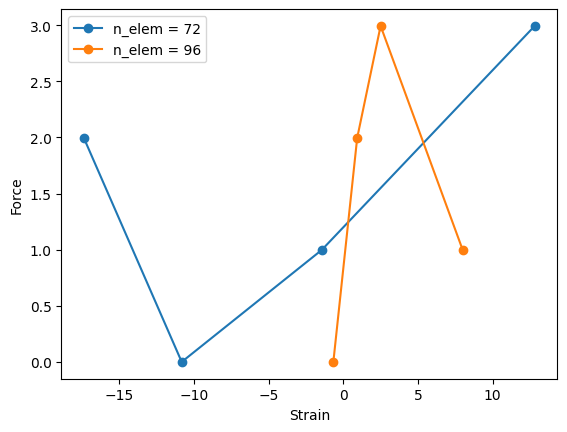

In [253]:
fig, ax = plt.subplots()
for i,n_elem in zip(range(len(n_elem_list)),n_elem_list):
    ax.plot(strain[i,:],forces[i,:], "o-",label="n_elem = {0}".format(n_elem))
plt.xlabel("Strain")
plt.ylabel("Force")
plt.legend()

In [4]:

test_muscle = Samuel_supercoil_stl(experimental_data=True)
additional_curve_list = [(test_muscle.passive_list,"Experiments")]
lower_bound_path = '/Users/ali-7800/Desktop/Research/dev_artificial_muscle/PyElastica/examples/ArtificialMusclesCases/SingleMuscleCases/PassiveForceTest/Samuel_supercoil_stl/data/lower_bound/'
upper_bound_path = '/Users/ali-7800/Desktop/Research/dev_artificial_muscle/PyElastica/examples/ArtificialMusclesCases/SingleMuscleCases/PassiveForceTest/Samuel_supercoil_stl/data/upper_bound/'

lower_bound_files = [f for f in listdir(lower_bound_path) if isfile(join(lower_bound_path,f))]
upper_bound_files = [f for f in listdir(upper_bound_path) if isfile(join(upper_bound_path,f))]


In [7]:
lower_strain = np.zeros(len(lower_bound_files))
lower_forces = np.zeros(len(lower_bound_files))
upper_strain = np.zeros(len(upper_bound_files))
upper_forces = np.zeros(len(upper_bound_files))
forces_list = [lower_forces,upper_forces]
strains_list = [lower_strain,upper_strain]
filenames_list = [lower_bound_files,upper_bound_files]
datapath_list = [lower_bound_path,upper_bound_path]
for i in range(2):
    for j in range(len(lower_bound_files)):
        current_filename = filenames_list[i][26:43]
        forces_list[i][j] = float()
        current_datapath = datapath_list[i]
        current_data = np.load(current_datapath+"/"+current_filename)

        muscle_positions = (np.array(data['muscle_rods_position_history']))
        centerline_position = np.zeros(muscle_positions.shape[1:])
        for k in range(muscle_positions.shape[0]):
            centerline_position += muscle_positions[k, :, :, :] / 3

        # n = centerline_position.shape[-1]
        strains_list[i][j] = np.dot(
            np.array([0.0,0.0,1.0]),
            (
                (centerline_position[-1, :, -1] - centerline_position[-1, :, 0])
                - (centerline_position[0, :, -1] - centerline_position[0, :, 0])
            )
            / (centerline_position[0, :, -1] - centerline_position[0, :, 0]),
        )

    sort_idx = np.argsort(strains_list[i])
    strains_list[i][:] = strains_list[i][sort_idx]
    forces_list[i][:] = forces_list[i][sort_idx]

TypeError: can only concatenate str (not "list") to str

In [ ]:

plt.rc("font", size=8)  # controls default text sizes
for curve_list, name in additional_curve_list:
    for curve in curve_list:
        plt.plot(curve[:, 0]/100, curve[:, 1], color="k", linewidth=1)
    plt.plot(curve[:, 0]/100, curve[:, 1], color="k", linewidth=1, label=name) # to show curve list name only once
